# IMPORTING THE LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# ACCESSING THE DATASET

In [31]:
credit_card=pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# INSPECTING THE DATASET

In [33]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
#checking the missing values
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
#distribution of valid & fraud transactions
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# PLOTTING THE DATA

<Axes: xlabel='Class', ylabel='count'>

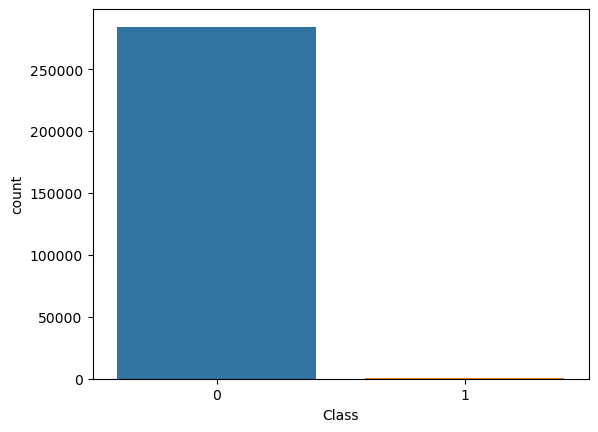

In [36]:
sns.countplot(x=credit_card['Class'])

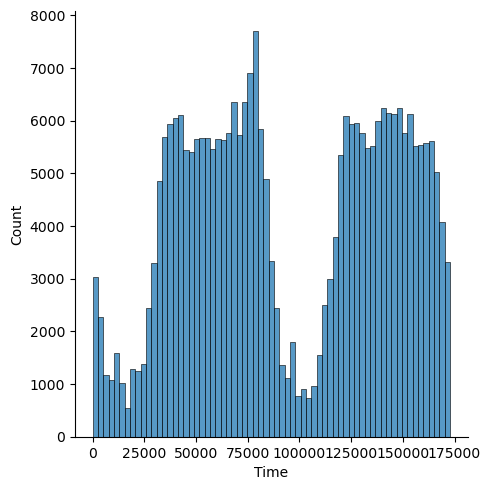

In [37]:
sns.displot(x=credit_card['Time'])

# Correlation card

<Axes: >

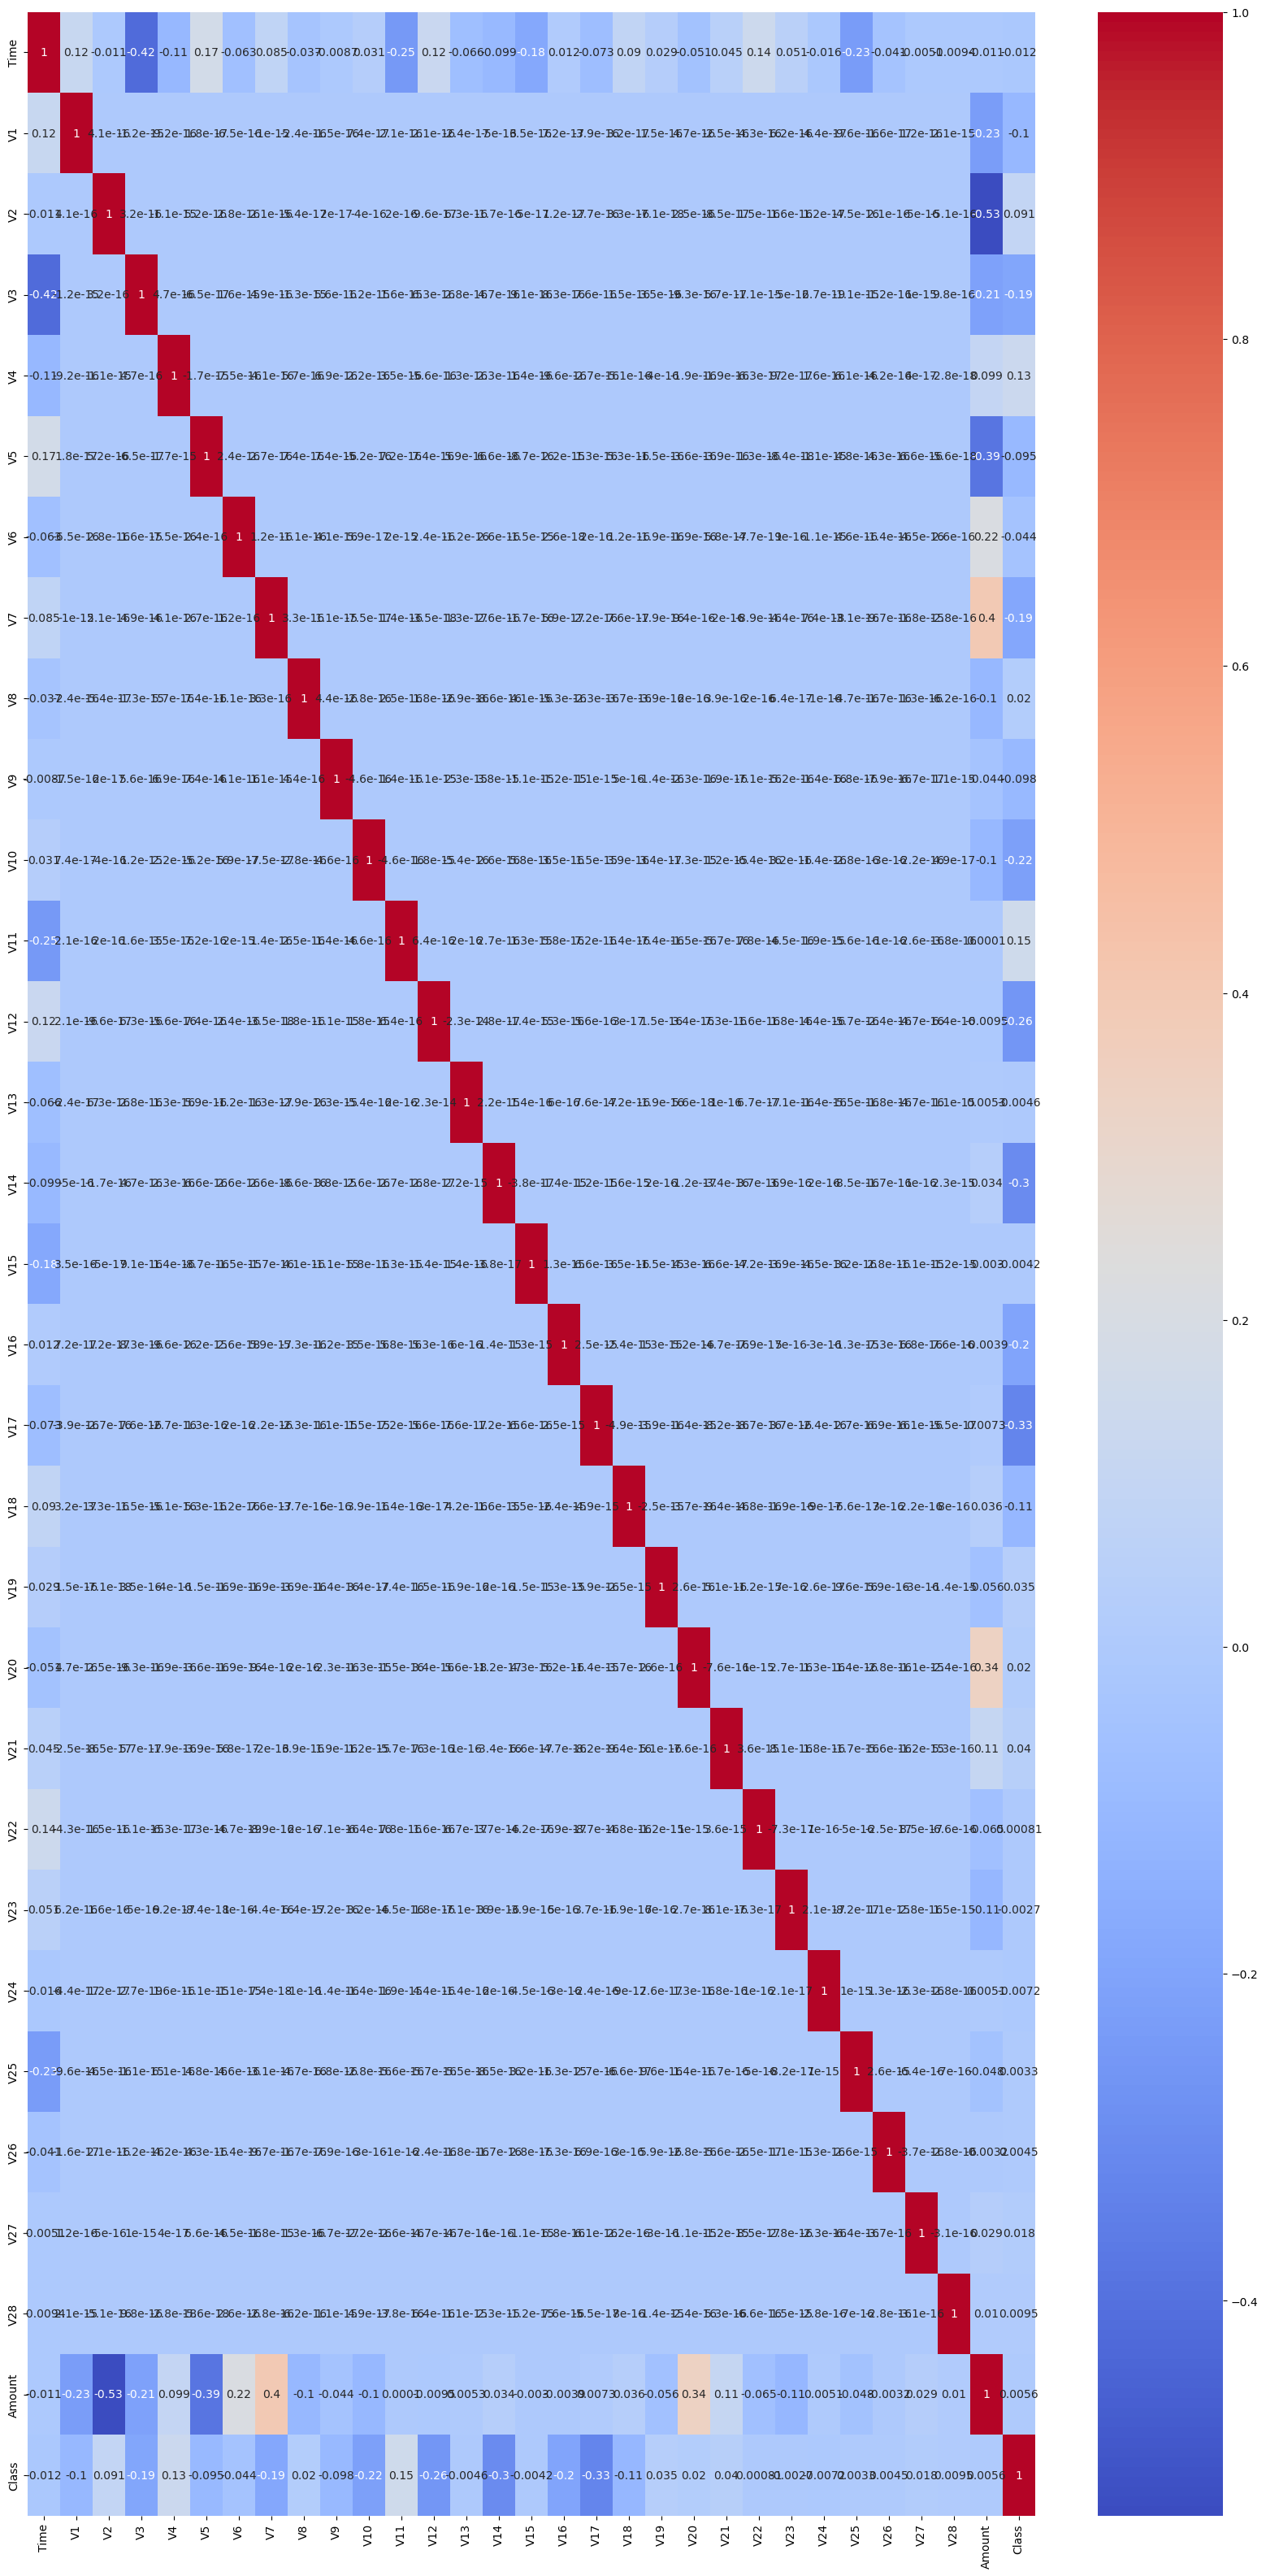

In [38]:
corr=credit_card.corr()
plt.figure(figsize=(20,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Data analysis

In [39]:
valid = credit_card[credit_card.Class == 0]
fraud = credit_card[credit_card.Class == 1]

In [40]:
print(valid.shape)

(284315, 31)


In [41]:
print(fraud.shape)

(492, 31)


In [42]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [43]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [44]:
#compare the values for transations
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# sampling dataset

In [45]:
valid_sample=valid.sample(n=492)

In [46]:
new_data=pd.concat([valid_sample,fraud],axis=0)

In [47]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31168,36242.0,1.011646,-0.423150,1.452980,1.773071,-1.239008,0.274700,-0.746750,0.211658,1.436798,...,0.078749,0.557261,-0.219031,0.433715,0.666066,-0.127929,0.080377,0.042017,63.30,0
50215,44393.0,1.217600,0.038273,0.350770,0.452994,-0.418147,-0.515266,-0.142601,0.051185,0.050718,...,-0.239016,-0.830229,0.093081,-0.045604,0.172317,0.101639,-0.045965,0.004008,12.99,0
120487,75845.0,1.076908,-0.161722,1.351710,0.736634,-0.829841,0.401093,-0.703395,0.265257,0.444741,...,0.018460,0.306700,0.054487,0.297828,0.169618,0.311720,0.038429,0.019091,11.49,0
214204,139577.0,-1.588572,-1.711071,1.709664,-4.340141,-0.216622,0.497323,-0.570063,0.550729,1.477870,...,-0.323053,-0.491802,-0.044306,-0.200248,0.998403,-0.898235,0.301269,0.139507,137.91,0
222000,142781.0,-6.275748,4.328172,-5.180989,-0.085479,-3.158617,-1.678612,-3.004431,4.036319,-0.738077,...,0.904831,1.248702,0.634000,-0.118442,-0.568130,-0.371891,-2.861170,-0.598655,2.99,0


In [48]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# spliting the dataset

In [49]:
x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [50]:
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
31168    36242.0  1.011646 -0.423150  1.452980  1.773071 -1.239008  0.274700   
50215    44393.0  1.217600  0.038273  0.350770  0.452994 -0.418147 -0.515266   
120487   75845.0  1.076908 -0.161722  1.351710  0.736634 -0.829841  0.401093   
214204  139577.0 -1.588572 -1.711071  1.709664 -4.340141 -0.216622  0.497323   
222000  142781.0 -6.275748  4.328172 -5.180989 -0.085479 -3.158617 -1.678612   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Training data &Testing data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic Regression

In [53]:
model=LogisticRegression()

In [54]:
model.fit(x_train,y_train)

LogisticRegression()

# Accuracy Score

In [55]:
pred=model.predict(x_test)

In [56]:
accuracy_score(y_test,pred)

0.9187817258883249

In [57]:
precision = precision_score(y_test, pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)

In [58]:
print("precision:",precision)
print("recall:",recall)
print("f1-score:",f1)

precision: 0.9456521739130435
recall: 0.8877551020408163
f1-score: 0.9157894736842105
